In [56]:
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [9]:
customers_df = pd.read_csv('customers_sample.csv')
policies_df = pd.read_csv('policies_sample.csv')
claims_df = pd.read_csv('claims_sample.csv')
fraud_df = pd.read_csv('fraud_detection_sample.csv')

customers_df.head() 

,customer_id,name,age,email,city,registration_date
0,1,Kenneth Davis,56,customer1@email.com,New York,2023-12-30
1,2,Deborah Moore,46,customer2@email.com,Los Angeles,2023-07-18
2,3,Joseph Rodriguez,60,customer3@email.com,Philadelphia,2022-12-31
3,4,Michael Baker,38,customer4@email.com,Philadelphia,2020-05-01
4,5,Paul Garcia,36,customer5@email.com,Phoenix,2023-05-23


In [ ]:
policies_df.head()

,policy_id,customer_id,policy_number,policy_type,annual_premium,coverage_amount,start_date,status
0,201,29,P1001,HOME,1153.05,10385.62,2022-06-05,EXPIRED
1,202,44,P1002,HEALTH,2840.23,31689.58,2022-08-16,EXPIRED
2,203,35,P1003,BUSINESS,7113.81,64808.93,2021-08-19,ACTIVE
3,204,28,P1004,AUTO,1330.08,41918.31,2023-07-19,ACTIVE
4,205,23,P1005,HEALTH,4083.91,109910.68,2022-11-15,ACTIVE


In [ ]:
claims_df.head()

,claim_id,policy_id,policy_number,claim_date,claim_amount,claim_type,status
0,101,244,P1044,2025-02-22,9644.43,MEDICAL,PENDING
1,102,203,P1003,2022-10-18,7061.45,FIRE,PENDING
2,103,271,P1071,2022-11-21,17933.97,ACCIDENT,PENDING
3,104,230,P1030,2025-05-19,8072.04,OTHER,APPROVED
4,105,229,P1029,2022-02-20,40902.59,MEDICAL,APPROVED


In [12]:
fraud_df.head()

,detection_id,claim_id,is_fraudulent,detected_by,detection_date,confidence_score
0,1,159,False,NaN,2024-06-27,NaN
1,2,141,False,NaN,2023-05-30,NaN
2,3,197,False,NaN,2022-05-09,NaN
3,4,110,False,NaN,2022-09-06,NaN
4,5,102,False,NaN,2022-10-27,NaN


### EDA

In [58]:
print("--- DataFrames Info & Missing Values ---")

# A dictionary to hold dataframes for easy iteration
dfs = {
    "Customers": customers_df,
    "Policies": policies_df,
    "Claims": claims_df,
    "Fraud": fraud_df
}

for name, df in dfs.items():
    print(f"\n--- {name} DataFrame ---")
    print(f"Shape: {df.shape}")
    print("\nInfo:")
    df.info()
    print("\nMissing Values:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0]) # Only print columns with missing values
    print("="*30)

--- DataFrames Info & Missing Values ---

--- Customers DataFrame ---
Shape: (50, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        50 non-null     int64 
 1   name               50 non-null     object
 2   age                50 non-null     int64 
 3   email              50 non-null     object
 4   city               50 non-null     object
 5   registration_date  50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB

Missing Values:
Series([], dtype: int64)

--- Policies DataFrame ---
Shape: (75, 8)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   policy_id        75 non-null     int64         
 1   customer_id      75 no

### Convert date to datetime object

In [15]:
customers_df['registration_date'] = pd.to_datetime(customers_df['registration_date'])
policies_df['start_date'] = pd.to_datetime(policies_df['start_date'])
claims_df['claim_date'] = pd.to_datetime(claims_df['claim_date'])
fraud_df['detection_date'] = pd.to_datetime(fraud_df['detection_date'])

### Merge the datasets

In [ ]:
# Merge claims with fraud data
claims_with_fraud_df = pd.merge(claims_df, fraud_df[['claim_id', 'is_fraudulent']], on='claim_id', how='left')
claims_with_fraud_df['is_fraudulent'] = claims_with_fraud_df['is_fraudulent'].fillna(False).astype(int)

# Merge policies with claims data
policies_with_claims_df = pd.merge(policies_df, claims_with_fraud_df, on='policy_id', how='left')

# Fill NaN claim amounts with 0 before aggregation
policies_with_claims_df['claim_amount'] = policies_with_claims_df['claim_amount'].fillna(0)

# Merge with customer data to create a single analytical table
full_df = pd.merge(customers_df, policies_with_claims_df, on='customer_id', how='left')

print("Data loaded and merged successfully.")
full_df.head()


Data loaded and merged successfully.


/var/folders/kc/c_87cnx52j3fl79n_jdvy5100000gn/T/ipykernel_16453/3677561064.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  claims_with_fraud_df['is_fraudulent'] = claims_with_fraud_df['is_fraudulent'].fillna(False).astype(int)


,customer_id,name,age,email,city,registration_date,policy_id,policy_number_x,policy_type,annual_premium,coverage_amount,start_date,status_x,claim_id,policy_number_y,claim_date,claim_amount,claim_type,status_y,is_fraudulent
0,1,Kenneth Davis,56,customer1@email.com,New York,2023-12-30,256.0,P1056,HEALTH,4598.76,118547.63,2022-08-04,ACTIVE,130.0,P1056,2024-03-02,29430.41,THEFT,APPROVED,0.0
1,2,Deborah Moore,46,customer2@email.com,Los Angeles,2023-07-18,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,3,Joseph Rodriguez,60,customer3@email.com,Philadelphia,2022-12-31,257.0,P1057,BUSINESS,5543.19,121194.54,2023-09-24,ACTIVE,153.0,P1057,2024-02-26,23396.02,FIRE,PENDING,0.0
3,4,Michael Baker,38,customer4@email.com,Philadelphia,2020-05-01,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,5,Paul Garcia,36,customer5@email.com,Phoenix,2023-05-23,259.0,P1059,LIFE,2074.17,27826.73,2022-03-08,EXPIRED,173.0,P1059,2022-11-20,4946.67,THEFT,APPROVED,0.0


### Feature Engineering

In [51]:
# Group by customer_id to aggregate data
customer_agg = {
    'start_date': 'min',
    'claim_id': 'count',
    'claim_amount': 'sum',
    'is_fraudulent': 'sum'
}
customer_summary_df = full_df.groupby('customer_id').agg(customer_agg).reset_index()
customer_summary_df.rename(columns={
    'start_date': 'first_policy_start_date',
    'claim_id': 'total_claims',
    'claim_amount': 'total_claim_amount',
    'is_fraudulent': 'fraud_claims'
}, inplace=True)

# Calculate total premium paid across ALL policies
total_premium_paid = policies_df.groupby('customer_id')['annual_premium'].sum().reset_index()
total_premium_paid.rename(columns={'annual_premium': 'total_premium_paid'}, inplace=True)

# Merge aggregated data back to the main customer summary
final_df = pd.merge(customer_summary_df, total_premium_paid, on='customer_id', how='left')

# handle NaN values
final_df['total_premium_paid'] = final_df['total_premium_paid'].fillna(0)
final_df['total_claim_amount'] = final_df['total_claim_amount'].fillna(0)
final_df['fraud_claims'] = final_df['fraud_claims'].fillna(0)

# Calculate policy tenure
current_date = datetime.now()
final_df['policy_tenure_days'] = (current_date - final_df['first_policy_start_date']).dt.days
final_df['policy_tenure_days'] = final_df['policy_tenure_days'].fillna(0)

print("Customer-level features calculated.")
final_df.head()


Customer-level features calculated.


,customer_id,first_policy_start_date,total_claims,total_claim_amount,fraud_claims,total_premium_paid,policy_tenure_days
0,1,2022-08-04,1,29430.41,0.0,4598.76,1103.0
1,2,NaT,0,0.00,0.0,0.00,0.0
2,3,2023-09-24,1,23396.02,0.0,5543.19,687.0
3,4,NaT,0,0.00,0.0,0.00,0.0
4,5,2022-03-08,3,43622.79,0.0,8290.87,1252.0


### Risk Scoring

In [53]:
# Calculate LTV and Loss Ratio
final_df['lifetime_value'] = final_df['total_premium_paid'] - final_df['total_claim_amount']
final_df['loss_ratio'] = np.where(final_df['total_premium_paid'] > 0,
                                  final_df['total_claim_amount'] / final_df['total_premium_paid'],
                                  0)

# Loss Ratio Score
loss_ratio_max = final_df['loss_ratio'].replace([np.inf, -np.inf], np.nan).max()
final_df['loss_ratio_score'] = np.where(loss_ratio_max > 0, (final_df['loss_ratio'] / loss_ratio_max) * 100, 0)

# Fraud Claims Score
fraud_max = final_df['fraud_claims'].max()
final_df['fraud_score'] = np.where(fraud_max > 0, (final_df['fraud_claims'] / fraud_max) * 100, 0)

# Claim Frequency Score
final_df['policy_tenure_years'] = final_df['policy_tenure_days'] / 365.25
final_df['claim_frequency_per_year'] = np.where(final_df['policy_tenure_years'] > 0,
                                                final_df['total_claims'] / final_df['policy_tenure_years'],
                                                0)
freq_max = final_df['claim_frequency_per_year'].max()
final_df['frequency_score'] = np.where(freq_max > 0, (final_df['claim_frequency_per_year'] / freq_max) * 100, 0)

# Final Weighted Risk Score 
final_df['risk_score'] = (
    final_df['loss_ratio_score'] * 0.50 +
    final_df['fraud_score'] * 0.30 +
    final_df['frequency_score'] * 0.20
)
final_df['risk_score'] = final_df['risk_score'].fillna(0).clip(0, 100).round(2)

final_df[['customer_id', 'lifetime_value', 'loss_ratio', 'risk_score']].head()


,customer_id,lifetime_value,loss_ratio,risk_score
0,1,-24831.65,6.399640,8.77
1,2,0.00,0.000000,0.00
2,3,-17852.83,4.220678,7.80
3,4,0.00,0.000000,0.00
4,5,-35331.92,5.261546,11.08


### Customer segmentation

In [54]:
# segmentation logic
def assign_segment(row):
    ltv = row['lifetime_value']
    risk = row['risk_score']
    if ltv >= 0 and risk <= 40:
        return 'Premium Partner'
    elif ltv >= 0 and 40 < risk <= 60:
        return 'Growth Prospect'
    elif ltv < 0 and risk > 60:
        return 'Risk Management'
    else:
        return 'Watch List'

final_df['segment'] = final_df.apply(assign_segment, axis=1)

output_columns = ['customer_id', 'lifetime_value', 'loss_ratio', 'risk_score', 'segment']
final_output_df = final_df[output_columns]

# Print summary
print("--- Customer Segmentation Analysis (Corrected Logic) ---")
segment_counts = final_df['segment'].value_counts()
print("\nCustomer counts per segment:")
print(segment_counts)
print("\n" + "="*35)

highest_risk_customers = final_df.sort_values(by='risk_score', ascending=False).head(3)
print("\nHighest-Risk Customers:")
for _, row in highest_risk_customers.iterrows():
    print(f"  - Customer ID: {row['customer_id']}, Risk Score: {row['risk_score']:.2f}")

print("\nRecommended Next Step:")
print("  - Manually review the policies and claims history of the highest-risk customers.")
print("  - The 'Risk Management' segment should be prioritized for proactive outreach by underwriting.")
print("  - 'Watch List' customers may have high loss ratios or recent claims; monitor their activity.")
print("--- End of Analysis ---")

# Display the final DataFrame
print("\n--- Final Customer Data Head ---")
final_output_df.head()


--- Customer Segmentation Analysis (Corrected Logic) ---

Customer counts per segment:
segment
Watch List         32
Premium Partner    17
Risk Management     1
Name: count, dtype: int64


Highest-Risk Customers:
  - Customer ID: 15, Risk Score: 60.05
  - Customer ID: 14, Risk Score: 57.30
  - Customer ID: 36, Risk Score: 50.37

Recommended Next Step:
  - Manually review the policies and claims history of the highest-risk customers.
  - The 'Risk Management' segment should be prioritized for proactive outreach by underwriting.
  - 'Watch List' customers may have high loss ratios or recent claims; monitor their activity.
--- End of Analysis ---

--- Final Customer Data Head ---


,customer_id,lifetime_value,loss_ratio,risk_score,segment
0,1,-24831.65,6.399640,8.77,Watch List
1,2,0.00,0.000000,0.00,Premium Partner
2,3,-17852.83,4.220678,7.80,Watch List
3,4,0.00,0.000000,0.00,Premium Partner
4,5,-35331.92,5.261546,11.08,Watch List


### Visualizations

/var/folders/kc/c_87cnx52j3fl79n_jdvy5100000gn/T/ipykernel_16453/1410464012.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='segment', order=final_df['segment'].value_counts().index, palette='viridis')
/var/folders/kc/c_87cnx52j3fl79n_jdvy5100000gn/T/ipykernel_16453/1410464012.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='segment', y='risk_score', order=final_df['segment'].value_counts().index, palette='plasma')


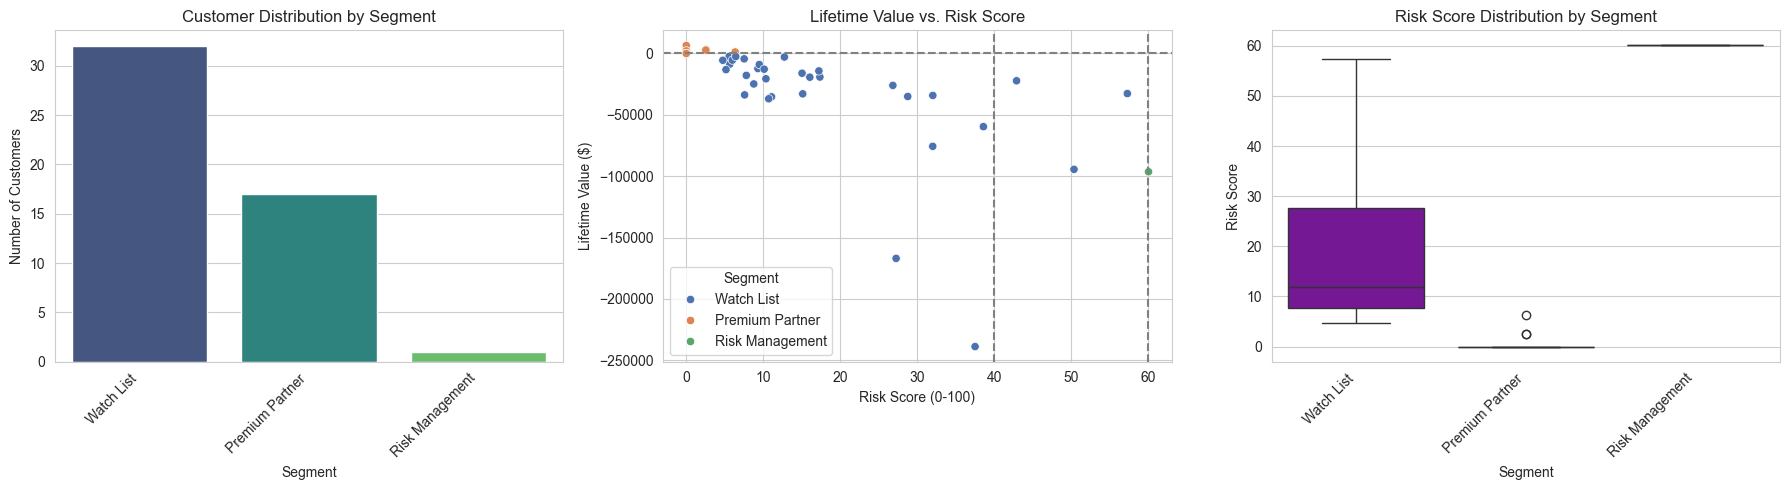

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

# Plot 1: Customer Distribution by Segment 
plt.subplot(1, 3, 1)
sns.countplot(data=final_df, x='segment', order=final_df['segment'].value_counts().index, palette='viridis')
plt.title('Customer Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')

# Plot 2: LTV vs. Risk Score 
plt.subplot(1, 3, 2)
sns.scatterplot(data=final_df, x='risk_score', y='lifetime_value', hue='segment', palette='deep')
plt.title('Lifetime Value vs. Risk Score')
plt.xlabel('Risk Score (0-100)')
plt.ylabel('Lifetime Value ($)')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(40, color='grey', linestyle='--')
plt.axvline(60, color='grey', linestyle='--')
plt.legend(title='Segment')

# Plot 3: Risk Score Distribution by Segment 
plt.subplot(1, 3, 3)
sns.boxplot(data=final_df, x='segment', y='risk_score', order=final_df['segment'].value_counts().index, palette='plasma')
plt.title('Risk Score Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Risk Score')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()
